<a href="https://colab.research.google.com/github/KajalThakur9/fraud-detection/blob/main/autoencode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model # encoding decoding

#Encoder
input_img=Input(shape=(784,)) # 784 image 28 x 28 image
encoded=Dense(128,activation='relu')(input_img) # 128 neurons

#Decoder
decoded=Dense(784,activation='sigmoid')(encoded)#

#Autoencoder
autoencoder=Model(input_img,decoded)

#compile and train the autoencoder

autoencoder.compile(optimizer='adam',loss='binary_crossentropy')


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

In [7]:
from os import X_OK
#1 load mnist dataset

(x_train,_),(x_test,_)=mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
#normalise data(0-255-0-1) and flatten (28 x28-784)

x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
x_train=x_train.reshape((len(x_train),784))
x_test=x_test.reshape((len(x_test),784))

In [10]:
#build autoencoder

input_img=Input(shape=(784,))
encoded=Dense(32,activation='relu')(input_img)#encoder
decoded=Dense(784,activation='sigmoid')(encoded)#decoder

autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [11]:
# Train autoencoder

autoencoder.fit(x_train,x_train,
                epochs=5, # try 50 for better results
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3829 - val_loss: 0.1900
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1798 - val_loss: 0.1542
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1499 - val_loss: 0.1356
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1336 - val_loss: 0.1233
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1224 - val_loss: 0.1140


In [12]:
#Test Auto encoder
decoded_imgs=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


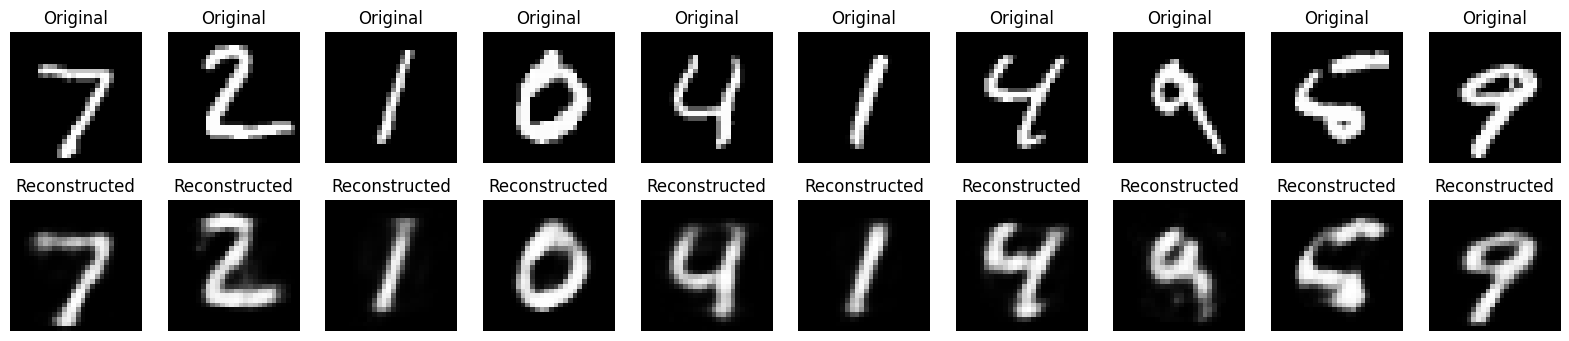

In [13]:
# show original vs reconstructed images

n=10
plt.figure(figsize=(20,4))
for i in range(n):
  #original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap="gray")
  plt.title("Original")
  plt.axis("off")

  # reconstructed

  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28),cmap="gray")
  plt.title("Reconstructed")
  plt.axis("off")
plt.show()